<a href="https://colab.research.google.com/github/data-science-and-machine-learning/MNIST-tensorflow-and-keras/blob/master/my_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Data Preprocessing


In [0]:
# convert into 1 dimentional matrix
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# normalise x_train 
# X => (X - Xmin)/(Xmax-Xmin) = X/255
x_train = x_train/255
x_test = x_test/255

In [0]:
# convert labels into catagorical format(one-hot encoding)
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

### Neural Network Modeling

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers

def three_layer_nn(input_dim= 784,\
                   neurons= [512, 256, 10],\
                   dropouts= [0.5, 0.2],\
                   activations= ['relu', 'relu', 'relu']):
  
  print('Evaluatiing following neural network:')
  print('| Dense:', neurons[0], '| Batch Normalization |', 'Dropout' ,dropouts[0],\
        '| Dense:', neurons[1], '| Batch Normalization |', 'Dropout' ,dropouts[1],\
        '| Dense:', neurons[2], '|')


  # Initializing a sequential model
  m= Sequential()
  # Adding 1st layer with he- normal initializer and relu activation function
  m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
  # Adding a batch normalization model
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[0]))
  # Adding 2nd layer relu activation function
  m.add(Dense(neurons[1], activation=activations[1]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[1]))

  # finally adding the output layer
  m.add(Dense(neurons[2], activation=activations[2]))
  
  # compiling the stack
  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return m


In [0]:
def four_layer_nn(input_dim= 784,\
                   neurons= [512, 256, 128, 10],\
                   dropouts= [0.5, 0.2, 0.2],\
                   activations= ['relu', 'relu', 'relu', 'relu']):

  print('Evaluatiing following neural network:')
  print('| Dense:', neurons[0], '| Batch Normalization |', 'Dropout' ,dropouts[0],\
        '| Dense:', neurons[1], '| Batch Normalization |', 'Dropout' ,dropouts[1],\
        '| Dense:', neurons[2], '| Batch Normalization |', 'Dropout' ,dropouts[2],\
        '| Dense:', neurons[3], '|')
  
  # Initializing a sequential model
  m= Sequential()
  
  # Adding 1st layer with he- normal initializer and relu activation function
  m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
  # Adding a batch normalization model
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[0]))
  
  # Adding 2nd layer activation function
  m.add(Dense(neurons[1], activation=activations[1]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[1]))
  
  # Adding 3rd layer activation function
  m.add(Dense(neurons[2], activation=activations[2]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[2]))


  # finally adding the output layer
  m.add(Dense(neurons[3], activation=activations[3]))
  # compiling the stack
  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  return m

In [0]:
def five_layer_nn(input_dim= 784,\
                   neurons= [512, 256, 128, 64, 10],\
                   dropouts= [0.5, 0.4, 0.3, 0.2],\
                   activations= ['relu', 'relu', 'relu', 'relu', 'relu']):
  
  print('Evaluatiing following neural network:')
  print('| Dense:', neurons[0], '| Batch Normalization |', 'Dropout' ,dropouts[0],\
        '| Dense:', neurons[1], '| Batch Normalization |', 'Dropout' ,dropouts[1],\
        '| Dense:', neurons[2], '| Batch Normalization |', 'Dropout' ,dropouts[2],\
        '| Dense:', neurons[3], '| Batch Normalization |', 'Dropout' ,dropouts[3],\
        '| Dense:', neurons[4], '|')

  # Initializing a sequential model
  m= Sequential()
  
  # Adding 1st layer with he- normal initializer and relu activation function
  m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
  # Adding a batch normalization model
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[0]))
  
  # Adding 2nd layer activation function
  m.add(Dense(neurons[1], activation=activations[1]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[1]))
  
  # Adding 3rd layer activation function
  m.add(Dense(neurons[2], activation=activations[2]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[2]))
  
  # Adding 4th layer activation function
  m.add(Dense(neurons[3], activation=activations[3]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[3]))


  # finally adding the output layer
  m.add(Dense(neurons[4], activation=activations[4]))
  # compiling the stack
  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return m


MLP with 3 layer network

In [0]:
num_classes= 64
output_dimentions= 10
dimentions= x_train.shape[1]
#input_dim, neurons, dropouts, activations
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit

model = KerasClassifier(build_fn=three_layer_nn, epochs=20, verbose=0)

dimentions_list= [dimentions]
dropouts= [[0.5, 0.2]]
batch = [32, 64, 128]

neurons_list= [[num_classes*4, num_classes*2, output_dimentions],
               [num_classes*2, num_classes*1, output_dimentions]]
activations_list= [['relu', 'relu', 'relu'],
                   ['relu', 'relu', 'sigmoid'],
                   ['relu', 'relu', 'softmax']]

param_grid = dict(#input_dim= dimentions_list,\
                  #dropouts= dropouts,\
                  neurons= neurons_list,\
                  batch_size=batch,\
                  activations= activations_list
                  )

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2, return_train_score=True, verbose= 1)
grid_result_3layers= grid.fit(x_train, y_train)

In [0]:
print("Best: %f using %s" % (grid_result_3layers.best_score_, grid_result_3layers.best_params_))
print("Best estimator: ", grid_result_3layers.best_estimator_)

means_test = grid_result_3layers.cv_results_['mean_test_score']
means_train = grid_result_3layers.cv_results_['mean_train_score']
stds_test = grid_result_3layers.cv_results_['std_test_score']
stds_train = grid_result_3layers.cv_results_['std_train_score']
params = grid_result_3layers.cv_results_['params']

for mean, mean_train, stdev, param in zip(means_test, means_train, stds_test, params):
    print("%f %f (%f) with: %r" % (mean, mean_train, stdev, param))

Best: 0.975717 using {'activations': ['relu', 'relu', 'softmax'], 'batch_size': 32, 'neurons': [256, 128, 10]}
Best estimator:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8e8fa53c50>
0.944050 0.953683 (0.008083) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [256, 128, 10]}
0.935117 0.942683 (0.002683) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [128, 64, 10]}
0.898700 0.907667 (0.024233) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [256, 128, 10]}
0.921417 0.928383 (0.000583) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [128, 64, 10]}
0.930433 0.938950 (0.004933) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [256, 128, 10]}
0.913917 0.919300 (0.004317) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [128, 64, 10]}
0.974850 0.993367 (0.000917) with: {'activations': ['relu', 'relu', 's

18


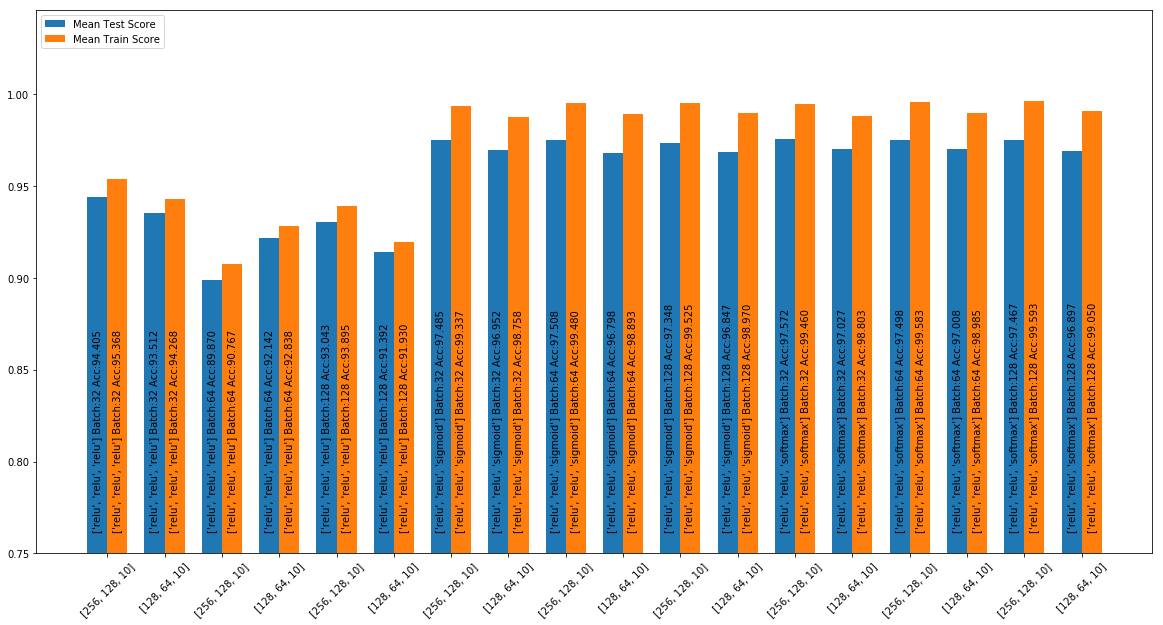

In [0]:
# comparision chart
fig, ax = plt.subplots(figsize=(20,10))

ind= np.arange(len(params))
width= 0.35
print(len(params))

rects1 = ax.bar(ind - width/2, means_test, width, 
                label='Mean Test Score')
rects2 = ax.bar(ind + width/2, means_train, width, 
                label='Mean Train Score')

ax.set_xticks(ind)
ax.set_xticklabels([param['neurons'] for param in params], rotation=45)
batches= [param['batch_size'] for param in params]
activators= [param['activations'] for param in params]

i= 0
for rect in rects1:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_test[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom',
                horizontalalignment='center', verticalalignment='center_baseline')
    i+=1
i=0
for rect in rects2:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_train[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom')
    i+=1
ax.set_ylim(bottom=0.75)
ax.legend(loc= 'upper left')



MLP with 4 layer network

In [25]:
num_classes= 64
output_dimentions= 10
dimentions= x_train.shape[1]
#input_dim, neurons, dropouts, activations
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=four_layer_nn, epochs=20, verbose=0)

batch = [32, 64, 128]
#dropouts= [[0.5, 0.3, 0.2],\
#           [0.2, 0.3, 0.5]]
#dimentions_list= [dimentions]
neurons_list= [[num_classes*8, num_classes*4, num_classes*2, output_dimentions],
               [num_classes*4, num_classes*2, num_classes*1, output_dimentions]]
activations_list= [['relu', 'relu', 'relu', 'relu'],
                   ['relu', 'relu', 'relu', 'sigmoid'],
                   ['relu', 'relu', 'relu', 'softmax']]

param_grid = dict(neurons= neurons_list,\
                  batch_size= batch,\
                  activations= activations_list)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2,  return_train_score= True, verbose= 1)
grid_result_4layers = grid.fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluat

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 101.1min finished


Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |


In [26]:
print("Best: %f using %s" % (grid_result_4layers.best_score_, grid_result_4layers.best_params_))
print("Best estimator: ", grid_result_4layers.best_estimator_)
means_test = grid_result_4layers.cv_results_['mean_test_score']
means_train = grid_result_4layers.cv_results_['mean_train_score']
stds = grid_result_4layers.cv_results_['std_test_score']
params = grid_result_4layers.cv_results_['params']
for mean, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print("%f, %f (%f) with: %r" % (mean, mean_train, stdev, param))

Best: 0.978500 using {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [512, 256, 128, 10]}
Best estimator:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f71f2f1a9e8>
0.937650, 0.947500 (0.002317) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [512, 256, 128, 10]}
0.930667, 0.937950 (0.002867) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [256, 128, 64, 10]}
0.945800, 0.955983 (0.000400) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [512, 256, 128, 10]}
0.900467, 0.903583 (0.001100) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [256, 128, 64, 10]}
0.935183, 0.944233 (0.005050) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [512, 256, 128, 10]}
0.883600, 0.887817 (0.013767) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neu

18


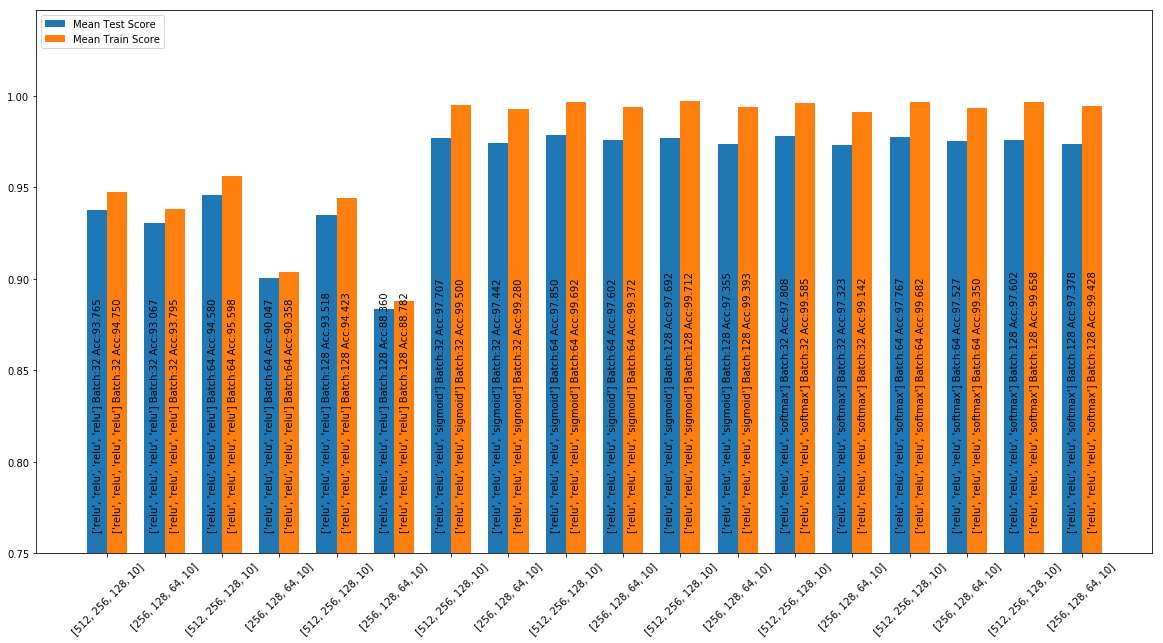

In [27]:
# comparision chart
fig, ax = plt.subplots(figsize=(20,10))

ind= np.arange(len(params))
width= 0.35
print(len(params))

rects1 = ax.bar(ind - width/2, means_test, width, 
                label='Mean Test Score')
rects2 = ax.bar(ind + width/2, means_train, width, 
                label='Mean Train Score')

ax.set_xticks(ind)
ax.set_xticklabels([param['neurons'] for param in params], rotation=45)
batches= [param['batch_size'] for param in params]
activators= [param['activations'] for param in params]

i= 0
for rect in rects1:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_test[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom',
                horizontalalignment='center', verticalalignment='center_baseline')
    i+=1
i=0
for rect in rects2:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_train[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom')
    i+=1
ax.set_ylim(bottom=0.75)
ax.legend(loc= 'upper left')



MLP with 5 layer network

In [0]:
num_classes= 64
output_dimentions= 10
dimentions= x_train.shape[1]

#input_dim, neurons, dropouts, activations
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=five_layer_nn, epochs=20, verbose=0)

batch = [32, 64, 128]
#dropouts= [[0.5, 0.3, 0.2, 0.2],\
#           [0.2, 0.3, 0.4, 0.5]]
dimentions_list= [dimentions]
neurons_list= [[num_classes*8, num_classes*4, num_classes*2, num_classes, output_dimentions]]
activations_list= [['relu', 'relu', 'relu', 'relu', 'relu'],
                   ['relu', 'relu', 'relu', 'relu', 'sigmoid'],
                   ['relu', 'relu', 'relu', 'relu', 'softmax']]

param_grid = dict(neurons= neurons_list,\
                  batch_size= batch,\
                  activations= activations_list)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2, return_train_score= True, verbose= 1)
grid_result_5layers = grid.fit(x_train, y_train)

In [0]:
print("Best: %f using %s" % (grid_result_5layers.best_score_, grid_result_5layers.best_params_))
print("Best estimator: ", grid_result_3layers.best_estimator_)
means_test = grid_result_5layers.cv_results_['mean_test_score']
means_train = grid_result_5layers.cv_results_['mean_train_score']
stds = grid_result_5layers.cv_results_['std_test_score']
params = grid_result_5layers.cv_results_['params']
for mean, stdev, param in zip(means_test, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977033 using {'activations': ['relu', 'relu', 'relu', 'relu', 'softmax'], 'batch_size': 64, 'neurons': [512, 256, 128, 64, 10]}
Best estimator:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8e8fa53c50>
0.910933 (0.020933) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [512, 256, 128, 64, 10]}
0.940983 (0.001350) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [512, 256, 128, 64, 10]}
0.872450 (0.000683) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [512, 256, 128, 64, 10]}
0.976250 (0.000150) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 32, 'neurons': [512, 256, 128, 64, 10]}
0.976817 (0.001883) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [512, 256, 128, 64, 10]}
0.975867 (0.000533) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'sig

9
9
9


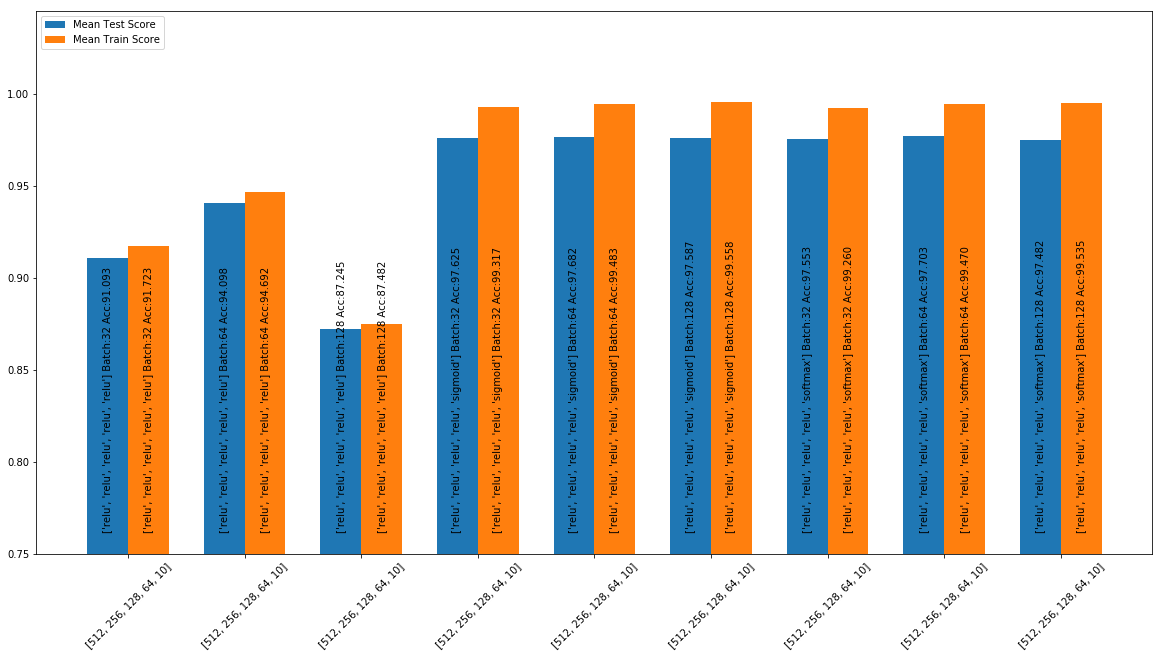

In [0]:
# comparision chart
fig, ax = plt.subplots(figsize=(20,10))

ind= np.arange(len(params))
width= 0.35
print(len(params))
print(len(means_test))
print(len(means_train))
rects1 = ax.bar(ind - width/2, means_test, width, label='Mean Test Score')
rects2 = ax.bar(ind + width/2, means_train, width, label='Mean Train Score')

ax.set_xticks(ind)
ax.set_xticklabels([param['neurons'] for param in params], rotation=45)
batches= [param['batch_size'] for param in params]
activators= [param['activations'] for param in params]

i= 0
for rect in rects1:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_test[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom',
                horizontalalignment='center', verticalalignment='center_baseline')
    i+=1
i=0
for rect in rects2:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_train[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom')
    i+=1
ax.set_ylim(bottom=0.75)
ax.legend(loc= 'upper left')


In [0]:
import pickle
with open('3nn_results.pickle', 'wb') as handle:
    pickle.dump(grid_result_3layers, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('4nn_results.pickle', 'wb') as handle:
    pickle.dump(grid_result_4layers, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('5nn_results.pickle', 'wb') as handle:
    pickle.dump(grid_result_5layers, handle, protocol=pickle.HIGHEST_PROTOCOL)


### Comparision: 
Here are few suggestions:

1. Can you please experiment with BN layer, without BN Layer, different activations, optimzers, weight initializations and architectures, different dropouts etc?
2. Please plot loss vs epoch for each models. In that way you will understand whether or not your models are overfitting.
2. Write a conclusion section at the end explaining what you did in this assignment.
3. Please plot the violin plots for the distribution of weights for hidden layers for all the models. 
4. Keep your earlier models, and experiment with new ones.

#### Without Batch Normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2987 - acc: 0.9087 - val_loss: 0.1258 - val_acc: 0.9617
Epoch 2/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1590 - acc: 0.9508 - val_loss: 0.0961 - val_acc: 0.9709
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1304 - acc: 0.9612 - val_loss: 0.0796 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1114 - acc: 0.9663 - val_loss: 0.0851 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1023 - acc: 0.9676 - val_loss: 0.0680 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0940 - acc: 0.9709 - val_loss: 0.0657 - val_acc: 0.9800
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0880 - acc: 0.9728 - val_loss: 0.0771 - 

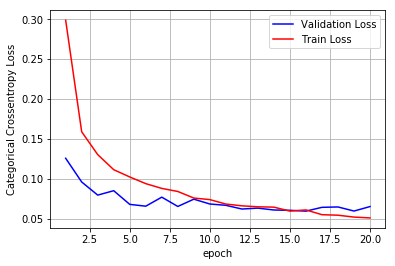

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers

input_dim= 784
dropouts= [0.5, 0.2]
neurons= [512, 128, 10]
activations= ['relu', 'relu', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = m.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

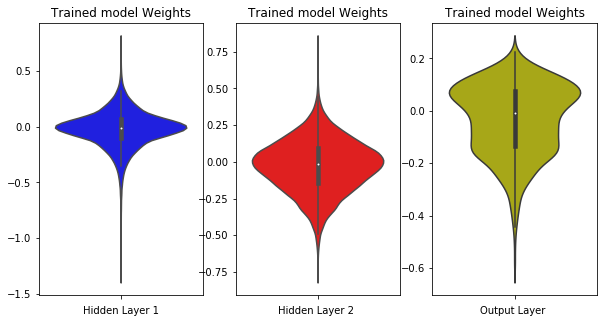

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With Batch Normalization

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.3165 - acc: 0.9035 - val_loss: 0.1193 - val_acc: 0.9633
Epoch 2/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.1905 - acc: 0.9409 - val_loss: 0.0950 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.1600 - acc: 0.9505 - val_loss: 0.0783 - val_acc: 0.9763
Epoch 4/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.1397 - acc: 0.9562 - val_loss: 0.0728 - val_acc: 0.9771
Epoch 5/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.1270 - acc: 0.9608 - val_loss: 0.0711 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.1178 - acc: 0.9633 - val_loss: 0.0627 - val_acc: 0.9805
Epoch 7/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.1081 - acc: 0.9657 - val_loss: 0.

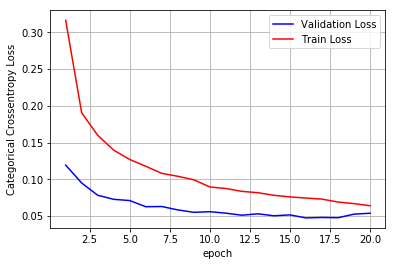

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers
batch_size= 32
epochs= 20
neurons= [512, 128, 10]
activations= ['relu', 'relu', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


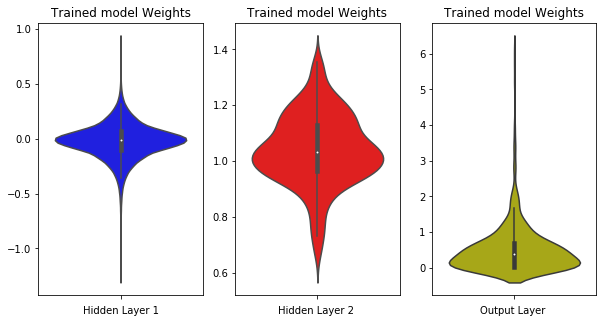

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With tanh activation functions

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.3670 - acc: 0.8892 - val_loss: 0.1650 - val_acc: 0.9519
Epoch 2/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.2223 - acc: 0.9333 - val_loss: 0.1142 - val_acc: 0.9654
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.1799 - acc: 0.9452 - val_loss: 0.0967 - val_acc: 0.9708
Epoch 4/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.1558 - acc: 0.9521 - val_loss: 0.0837 - val_acc: 0.9738
Epoch 5/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.1420 - acc: 0.9560 - val_loss: 0.0765 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.1264 - acc: 0.9605 - val_loss: 0.0762 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.1168 - acc: 0.9643 - val_loss: 0.

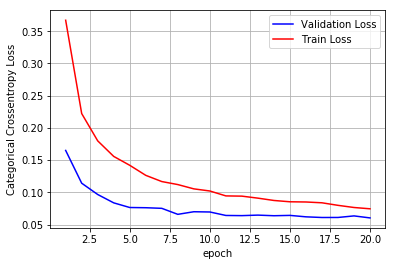

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers

neurons= [512, 128, 10]
activations= ['tanh', 'tanh', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.glorot_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


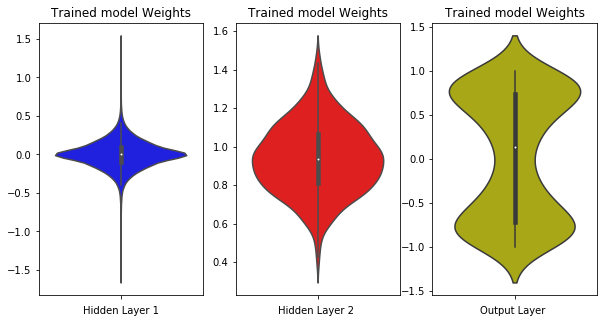

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With sigmoid activation functions

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.3822 - acc: 0.8832 - val_loss: 0.1847 - val_acc: 0.9444
Epoch 2/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.2503 - acc: 0.9246 - val_loss: 0.1409 - val_acc: 0.9571
Epoch 3/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.2027 - acc: 0.9381 - val_loss: 0.1140 - val_acc: 0.9631
Epoch 4/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.1755 - acc: 0.9468 - val_loss: 0.0947 - val_acc: 0.9701
Epoch 5/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.1524 - acc: 0.9524 - val_loss: 0.0852 - val_acc: 0.9730
Epoch 6/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.1348 - acc: 0.9582 - val_loss: 0.0802 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.1259 - acc: 0.9609 - val_loss: 0.

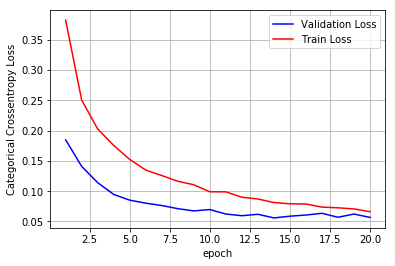

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers

neurons= [512, 128, 10]
activations= ['sigmoid', 'sigmoid', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.glorot_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

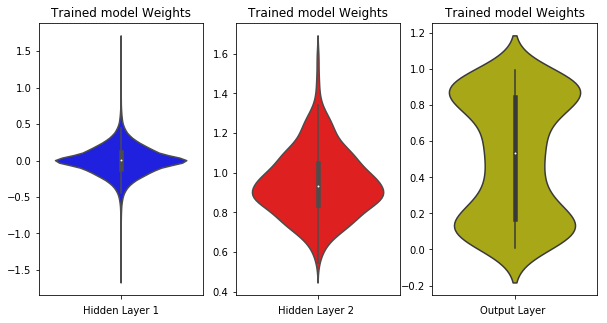

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With adagrad optimizer

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.2968 - acc: 0.9093 - val_loss: 0.1218 - val_acc: 0.9624
Epoch 2/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1874 - acc: 0.9423 - val_loss: 0.0965 - val_acc: 0.9696
Epoch 3/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1579 - acc: 0.9520 - val_loss: 0.0861 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1371 - acc: 0.9570 - val_loss: 0.0781 - val_acc: 0.9761
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1262 - acc: 0.9609 - val_loss: 0.0732 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1159 - acc: 0.9641 - val_loss: 0.0701 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.1084 - acc: 0.9661 - val_loss: 0.

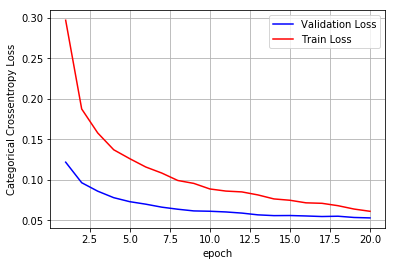

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adam
from keras import initializers

neurons= [512, 128, 10]
activations= ['relu', 'relu', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer=Adagrad(), loss='categorical_crossentropy', metrics=['accuracy'])
history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

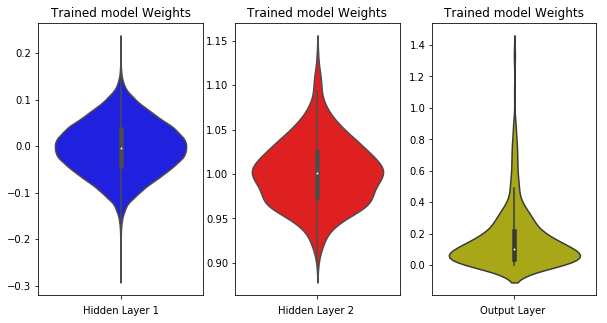

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With rmsprop optimizer

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.3028 - acc: 0.9076 - val_loss: 0.1276 - val_acc: 0.9607
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1764 - acc: 0.9474 - val_loss: 0.0898 - val_acc: 0.9724
Epoch 3/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1505 - acc: 0.9548 - val_loss: 0.0784 - val_acc: 0.9757
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1331 - acc: 0.9597 - val_loss: 0.0736 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1210 - acc: 0.9631 - val_loss: 0.0684 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1127 - acc: 0.9668 - val_loss: 0.0657 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.1073 - acc: 0.9679 - val_loss: 0.

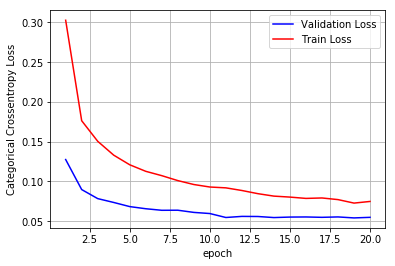

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers

neurons= [512, 128, 10]
activations= ['relu', 'relu', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

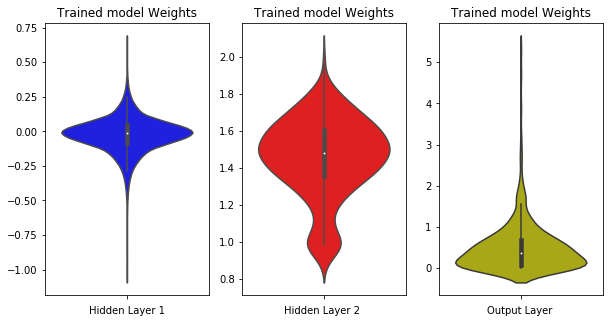

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With sgd optimizer

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.3274 - acc: 0.8984 - val_loss: 0.1301 - val_acc: 0.9623
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1998 - acc: 0.9390 - val_loss: 0.1029 - val_acc: 0.9681
Epoch 3/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1676 - acc: 0.9468 - val_loss: 0.0836 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.1530 - acc: 0.9531 - val_loss: 0.0748 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.1356 - acc: 0.9572 - val_loss: 0.0702 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.1261 - acc: 0.9600 - val_loss: 0.0663 - val_acc: 0.9789
Epoch 7/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1165 - acc: 0.9634 - val_loss: 0.

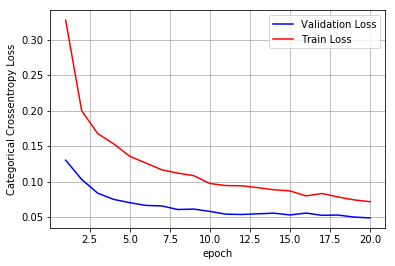

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers, optimizers

input_dim= 784
batch_size= 32
epochs= 20
dropouts= [0.5, 0.2]
neurons= [512, 128, 10]
activations= ['relu', 'relu', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# compiling the stack
m.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

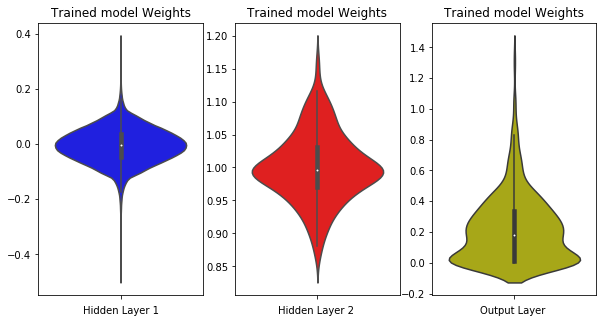

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With adadelta optimizer

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.3212 - acc: 0.9016 - val_loss: 0.1162 - val_acc: 0.9634
Epoch 2/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1805 - acc: 0.9456 - val_loss: 0.0853 - val_acc: 0.9743
Epoch 3/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1462 - acc: 0.9552 - val_loss: 0.0761 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.1269 - acc: 0.9621 - val_loss: 0.0707 - val_acc: 0.9777
Epoch 5/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1159 - acc: 0.9652 - val_loss: 0.0683 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1046 - acc: 0.9683 - val_loss: 0.0630 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.1014 - acc: 0.9691 - val_loss: 0.

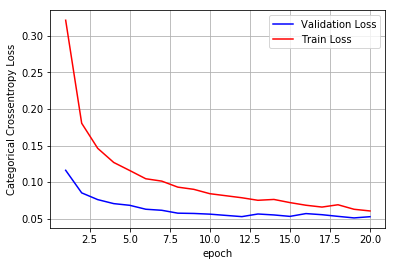

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adam
from keras import initializers

neurons= [512, 128, 10]
activations= ['relu', 'relu', 'softmax']

#fig,ax = plt.subplots(1,1)


# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])
history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

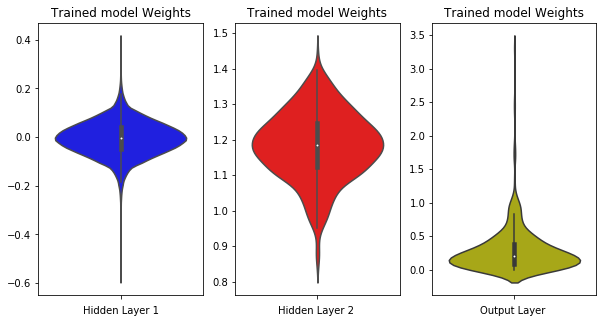

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### With adam optimizer

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.3230 - acc: 0.9009 - val_loss: 0.1260 - val_acc: 0.9606
Epoch 2/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1881 - acc: 0.9421 - val_loss: 0.0949 - val_acc: 0.9693
Epoch 3/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.1586 - acc: 0.9506 - val_loss: 0.0836 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.1413 - acc: 0.9564 - val_loss: 0.0790 - val_acc: 0.9760
Epoch 5/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.1283 - acc: 0.9594 - val_loss: 0.0680 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.1196 - acc: 0.9624 - val_loss: 0.0670 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.1092 - acc: 0.9655 - val_loss: 0.

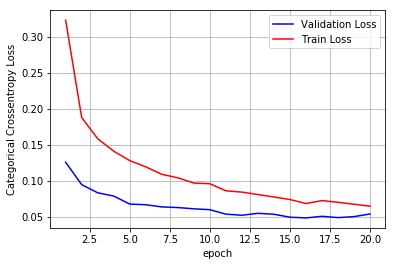

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adam
from keras import initializers

neurons= [512, 128, 10]
activations= ['relu', 'relu', 'softmax']

# Initializing a sequential model
m= Sequential()
# Adding 1st layer with he- normal initializer and relu activation function
m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
# Adding a batch normalization model
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[0]))
# Adding 2nd layer relu activation function
m.add(Dense(neurons[1], activation=activations[1]))
# Adding batch normalization layer
m.add(BatchNormalization())
# adding a dropout
m.add(Dropout(dropouts[1]))

# finally adding the output layer
m.add(Dense(neurons[2], activation=activations[2]))

# compiling the stack
m.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = m.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
x = list(range(1,21))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

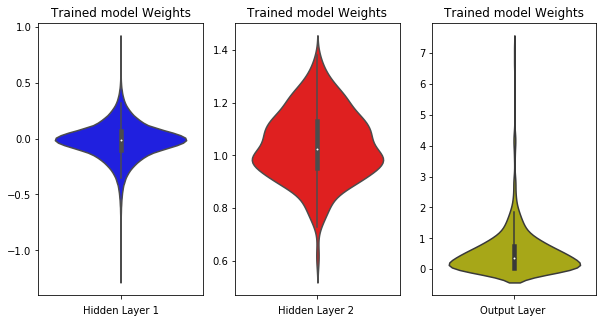

In [0]:
w_after = m.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

#### Comparing results

without batch normalization accuracy= 98.37
with batch normalization accuracy=  98.37 with smother epoch loss curve means less overfitting than without batch normalization

with tanh activation func and xavior/glorot initializer accuracy= 98.19
not that drastic reduction in validation loss as with relu activation function because weights are distributed within all output layers whereas with relu activation function output layer weights are less distributed amongs all layers

with sigmoid activation function accuracy= 98.28 better results than tanh
not that drastic reduction in validation loss as with relu activation function 
Comparing Optimizers:

With adagrad optimizer accuracy= 98.37

With RMSprop optimizeraccuracy= 98.36

With SGD optmizer accuracy= 98.39

With Adadelta optimizer accuracy= 98.46

With Adam optimizer accuracy= 98.35


In [20]:
from prettytable import PrettyTable
print('3 Layer Perceptron')
x= PrettyTable(['Neurons', 'Batch_size', 'Activators', 'Test Score'])
x.add_row(['[256, 128, 10]', '32', '[relu, relu, relu]', '0.944'])
x.add_row(['[128, 64, 10]', '32', '[relu, relu, relu]', '0.935'])
x.add_row(['[256, 128, 10]', '64', '[relu, relu, relu]', '0.898'])
x.add_row(['[128, 64, 10]', '64', '[relu, relu, relu]', '0.921'])
x.add_row(['[256, 128, 10]', '32', '[relu, relu, sigmoid]', '0.974'])
x.add_row(['[128, 64, 10]', '32', '[relu, relu, sigmoid]', '0.969'])
x.add_row(['[256, 128, 10]', '64', '[relu, relu, sigmoid]', '0.975'])
x.add_row(['[128, 64, 10]', '64', '[relu, relu, sigmoid]', '0.967'])
x.add_row(['[256, 128, 10]', '32', '[relu, relu, softmax]', '0.975'])
x.add_row(['[128, 64, 10]', '32', '[relu, relu, softmax]', '0.970'])
x.add_row(['[256, 128, 10]', '64', '[relu, relu, softmax]', '0.974'])
x.add_row(['[128, 64, 10]', '64', '[relu, relu, softmax]', '0.970'])
print(x)

3 Layer Perceptron
+----------------+------------+-----------------------+------------+
|    Neurons     | Batch_size |       Activators      | Test Score |
+----------------+------------+-----------------------+------------+
| [256, 128, 10] |     32     |   [relu, relu, relu]  |   0.944    |
| [128, 64, 10]  |     32     |   [relu, relu, relu]  |   0.935    |
| [256, 128, 10] |     64     |   [relu, relu, relu]  |   0.898    |
| [128, 64, 10]  |     64     |   [relu, relu, relu]  |   0.921    |
| [256, 128, 10] |     32     | [relu, relu, sigmoid] |   0.974    |
| [128, 64, 10]  |     32     | [relu, relu, sigmoid] |   0.969    |
| [256, 128, 10] |     64     | [relu, relu, sigmoid] |   0.975    |
| [128, 64, 10]  |     64     | [relu, relu, sigmoid] |   0.967    |
| [256, 128, 10] |     32     | [relu, relu, softmax] |   0.975    |
| [128, 64, 10]  |     32     | [relu, relu, softmax] |   0.970    |
| [256, 128, 10] |     64     | [relu, relu, softmax] |   0.974    |
| [128, 64, 10]

In [0]:
from prettytable import PrettyTable
Best: 0.978767 using {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 32, 'neurons': [512, 256, 128, 10]}
Best estimator:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f721e0aa978>
0.956183, 0.966167 (0.001250) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [512, 256, 128, 10]}
0.939683, 0.948083 (0.000783) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [256, 128, 64, 10]}
0.936067, 0.943750 (0.005300) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [512, 256, 128, 10]}
0.939600, 0.947050 (0.009900) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [256, 128, 64, 10]}
0.932650, 0.940717 (0.006983) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [512, 256, 128, 10]}
0.938750, 0.945067 (0.000083) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [256, 128, 64, 10]}
0.978767, 0.995933 (0.000800) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 32, 'neurons': [512, 256, 128, 10]}
0.975050, 0.991917 (0.001017) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 32, 'neurons': [256, 128, 64, 10]}
0.977917, 0.996667 (0.000117) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [512, 256, 128, 10]}
0.974500, 0.993800 (0.000000) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [256, 128, 64, 10]}
0.977200, 0.997283 (0.000400) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 128, 'neurons': [512, 256, 128, 10]}
0.973633, 0.994617 (0.000633) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 128, 'neurons': [256, 128, 64, 10]}
0.977700, 0.995667 (0.000033) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 32, 'neurons': [512, 256, 128, 10]}
0.974683, 0.992000 (0.000217) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 32, 'neurons': [256, 128, 64, 10]}
0.978450, 0.997167 (0.000450) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [512, 256, 128, 10]}
0.974683, 0.994167 (0.000783) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [256, 128, 64, 10]}
0.976750, 0.996967 (0.000217) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 128, 'neurons': [512, 256, 128, 10]}
0.973867, 0.994283 (0.001067) with: {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 128, 'neurons': [256, 128, 64, 10]}
print('4 Layer Perceptron')
x= PrettyTable(['Neurons', 'Batch_size', 'Activators', 'Test Score'])
x.add_row(['[512, 256, 128, 10]', '32', '[relu, relu, relu, relu]', '0.956'])
x.add_row(['[256, 128, 64, 10]', '32', '[relu, relu, relu, relu]', '0.939'])
x.add_row(['[512, 256, 128, 10]', '64', '[relu, relu, relu, relu]', '0.936'])
x.add_row(['[256, 128, 64, 10]', '64', '[relu, relu, relu, relu]', '0.939'])
x.add_row(['[512, 256, 128, 10]', '128', '[relu, relu, relu, relu]', '0.932'])
x.add_row(['[256, 128, 64, 10]', '128', '[relu, relu, relu, relu]', '0.938'])

x.add_row(['[512, 256, 128, 10]', '32', '[relu, relu, relu, sigmoid]', '0.978'])
x.add_row(['[256, 128, 64, 10]', '32', '[relu, relu, relu, sigmoid]', '0.975'])
x.add_row(['[512, 256, 128, 10]', '64', '[relu, relu, relu, sigmoid]', '0.977'])
x.add_row(['[256, 128, 64, 10]', '64', '[relu, relu, relu, sigmoid]', '0.974'])
x.add_row(['[512, 256, 128, 10]', '128', '[relu, relu, relu, sigmoid]', '0.977'])
x.add_row(['[256, 128, 64, 10]', '128', '[relu, relu, relu, sigmoid]', '0.9'])



print(x)

In [21]:
from prettytable import PrettyTable
print('5 Layer Perceptron')
x= PrettyTable(['Neurons', 'Batch_size', 'Activators', 'Test Score'])
x.add_row(['[512, 256, 128, 64, 10]', '32', '[relu, relu, relu, relu, relu]', '0.91'])
x.add_row(['[512, 256, 128, 64, 10]', '64', '[relu, relu, relu, relu, relu]', '0.94'])
x.add_row(['[512, 256, 128, 64, 10]', '128', '[relu, relu, relu, relu, relu]', '0.87'])
x.add_row(['[512, 256, 128, 64, 10]', '32', '[relu, relu, relu, relu, sigmoid]', '0.976'])
x.add_row(['[512, 256, 128, 64, 10]', '64', '[relu, relu, relu, relu, sigmoid]', '0.976'])
x.add_row(['[512, 256, 128, 64, 10]', '128', '[relu, relu, relu, relu, sigmoid]', '0.975'])
x.add_row(['[512, 256, 128, 64, 10]', '32', '[relu, relu, relu, relu, softmax]', '0.975'])
x.add_row(['[512, 256, 128, 64, 10]', '64', '[relu, relu, relu, relu, softmax]', '0.977'])
x.add_row(['[512, 256, 128, 64, 10]', '128', '[relu, relu, relu, relu, softmax]', '0.974'])
print(x)

5 Layer Perceptron
+-------------------------+------------+-----------------------------------+------------+
|         Neurons         | Batch_size |             Activators            | Test Score |
+-------------------------+------------+-----------------------------------+------------+
| [512, 256, 128, 64, 10] |     32     |   [relu, relu, relu, relu, relu]  |    0.91    |
| [512, 256, 128, 64, 10] |     64     |   [relu, relu, relu, relu, relu]  |    0.94    |
| [512, 256, 128, 64, 10] |    128     |   [relu, relu, relu, relu, relu]  |    0.87    |
| [512, 256, 128, 64, 10] |     32     | [relu, relu, relu, relu, sigmoid] |   0.976    |
| [512, 256, 128, 64, 10] |     64     | [relu, relu, relu, relu, sigmoid] |   0.976    |
| [512, 256, 128, 64, 10] |    128     | [relu, relu, relu, relu, sigmoid] |   0.975    |
| [512, 256, 128, 64, 10] |     32     | [relu, relu, relu, relu, softmax] |   0.975    |
| [512, 256, 128, 64, 10] |     64     | [relu, relu, relu, relu, softmax] |   0.

In [24]:
from prettytable import PrettyTable
print('3 Layer Perceptron analysis with batch normalization, initializer, and optimizer')
print('Comparing batch normalization')
x= PrettyTable(['Neurons', 'Batch_size', 'Dropouts', 'Activation', 'Initializer', 'Optimizer', 'Score', 'Observation'])
x.add_row(['[512, 128, 10]', '32 without batch normalization', '[0.5, 0.2]', ['relu, relu, softmax'], 'he-normal', 'adam', '0.983', ''])
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['relu, relu, softmax'], 'he-normal', 'adam', '0.983', 'With Batchnormalization it can be observed from loss v epochs graph that the loss curve is less fluctuating with batch normalization of layers'])
print(x)

x= PrettyTable(['Neurons', 'Batch_size', 'Dropouts', 'Activation', 'Initializer', 'Optimizer', 'Score', 'Observation'])
print('Comparing Activation functions')
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['tanh, tanh, softmax'], 'glorot-normal', 'adam', '0.981', ''])
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['sigmoid, sigmoid, softmax'], 'glorot-normal', 'adam', '0.982', 'Accuracy is best with relu activation and weights are distributed among less output layer making it more generalized in nature'])
print(x)

x= PrettyTable(['Neurons', 'Batch_size', 'Dropouts', 'Activation', 'Initializer', 'Optimizer', 'Score', 'Observation'])
print('Comparing Optimizers')
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['relu, relu, softmax'], 'he-normal', 'adagrad', '0.983', ''])
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['relu, relu, softmax'], 'he-normal', 'rmsprop', '0.9836', ''])
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['relu, relu, softmax'], 'he-normal', 'SGD', '0.9839', ''])
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['relu, relu, softmax'], 'he-normal', 'adadelta', '0.9846', ''])
x.add_row(['[512, 128, 10]', '32 with batch normalization', '[0.5, 0.2]', ['relu, relu, softmax'], 'he-normal', 'adam', '0.9835', 'Adadelta optimizer gives best result among all optimizer in this case'])
print(x)


3 Layer Perceptron analysis with batch normalization, initializer, and optimizer
Comparing batch normalization
+----------------+--------------------------------+------------+-------------------------+-------------+-----------+-------+------------------------------------------------------------------------------------------------------------------------------------------------+
|    Neurons     |           Batch_size           |  Dropouts  |        Activation       | Initializer | Optimizer | Score |                                                                  Observation                                                                   |
+----------------+--------------------------------+------------+-------------------------+-------------+-----------+-------+------------------------------------------------------------------------------------------------------------------------------------------------+
| [512, 128, 10] | 32 without batch normalization | [0.5, 0.2] | ['relu, relu, 